In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv('train_data.csv',header=0,sep=',',index_col=0)
validation_data=pd.read_csv('validation_data.csv',header=0,sep=',',index_col=0)
train_validation_data=pd.read_csv('train_validation_data.csv',header=0,sep=',',index_col=0)
test_data=pd.read_csv('test_data.csv',header=0,sep=',',index_col=0)

x_train=train_data.drop('shares',axis=1)
y_train=train_data['shares']
x_validation=validation_data.drop('shares',axis=1)
y_validation=validation_data['shares']
x_train_validation=train_validation_data.drop('shares',axis=1)
y_train_validation=train_validation_data['shares']
x_test=test_data.drop('shares',axis=1)
y_test=test_data['shares']

In [3]:
# Build the random forest classifier function

def RF(d,l):
    rf=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=d,min_samples_leaf=l)
    rf.fit(x_train,y_train)
    
    #auc score
    rf_auc=roc_auc_score(y_validation,rf.predict_proba(x_validation)[:,1])
    
    #tpr
    rf_true_positive=confusion_matrix(y_validation,rf.predict(x_validation))[1][1]
    rf_false_negative=confusion_matrix(y_validation,rf.predict(x_validation))[1][0]
    rf_true_positive_rate=rf_true_positive/(rf_true_positive+rf_false_negative)
    
    return rf_auc,rf_true_positive_rate

In [4]:
# Convert all auc_score and tpr to a dataframe

dict_rf={'max_depth':[],'min_samples_leaf':[],'auc_score':[],'tpr':[]}

d_list=[10,100,200,1000,2000,5000]
l_list=[10,100,200,1000,2000,5000]

for d in d_list:
    for l in l_list:
        auc_score,tpr=RF(d,l)
            
        dict_rf['max_depth'].append(d)
        dict_rf['min_samples_leaf'].append(l)
        dict_rf['auc_score'].append(auc_score)
        dict_rf['tpr'].append(tpr)

df_rf=pd.DataFrame(dict_rf)

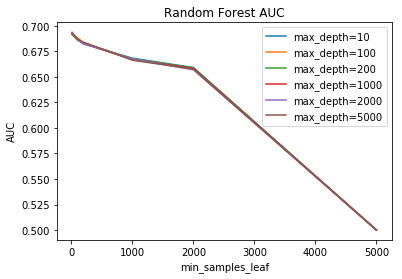

In [29]:
# draw plots for auc and tpr based on hyperparameter choices

for d in d_list:
    plt.plot(l_list,df_rf[df_rf['max_depth']==d]['auc_score'],label='max_depth='+str(d))

plt.title('Random Forest AUC')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.legend()

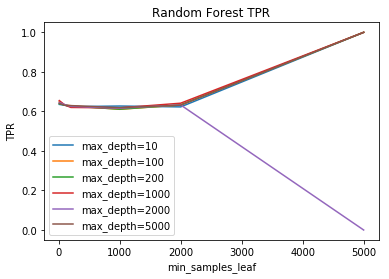

In [32]:
for d in d_list:
    plt.plot(l_list,df_rf[df_rf['max_depth']==d]['tpr'],label='max_depth='+str(d))

plt.title('Random Forest TPR')
plt.xlabel('min_samples_leaf')
plt.ylabel('TPR')
plt.legend()

In [33]:
# Find the best hyperparameter for the best auc

max_depth1=df_rf[df_rf['auc_score']==df_rf['auc_score'].max()]['max_depth'].item()
min_samples_leaf1=df_rf[df_rf['auc_score']==df_rf['auc_score'].max()]['min_samples_leaf'].item()
print('best auc based max depth='+str(max_depth1))
print('best auc based min_samples_leaf='+str(min_samples_leaf1))

best auc based max depth=1000
best auc based min_samples_leaf=10


best auc based auc is 0.7076996079019005
best auc based tpr is 0.6786786786786787


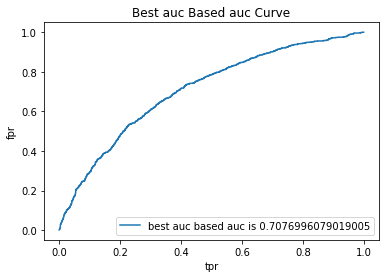

In [35]:
# Fit again in train_validation_data and test in test data

rf1=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=max_depth1,min_samples_leaf=min_samples_leaf1)
rf1.fit(x_train_validation,y_train_validation)

rf1_tpr,rf1_fpr,_=roc_curve(y_test,rf1.predict_proba(x_test)[:,1])
rf1_auc=roc_auc_score(y_test,rf1.predict_proba(x_test)[:,1])
plt.plot(rf1_tpr,rf1_fpr,label='best auc based auc is '+str(rf1_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend()
plt.title('Best auc Based auc Curve')

rf1_true_positive=confusion_matrix(y_test,rf1.predict(x_test))[1][1]
rf1_false_negative=confusion_matrix(y_test,rf1.predict(x_test))[1][0]
rf1_true_positive_rate=rf1_true_positive/(rf1_true_positive+rf1_false_negative)

print('best auc based auc is '+str(rf1_auc))
print('best auc based tpr is '+str(rf1_true_positive_rate))

In [34]:
max_depth2=df_rf[df_rf['tpr']==df_rf['tpr'].max()]['max_depth'].iloc[0]
min_samples_leaf2=df_rf[df_rf['tpr']==df_rf['tpr'].max()]['min_samples_leaf'].iloc[0]
print('best tpr based max depth='+str(max_depth2))
print('best tpr based min_samples_leaf='+str(min_samples_leaf2))

best tpr based max depth=10
best tpr based min_samples_leaf=5000


best tpr based auc is 0.6537093398185778
best tpr based tpr is 0.6036036036036037


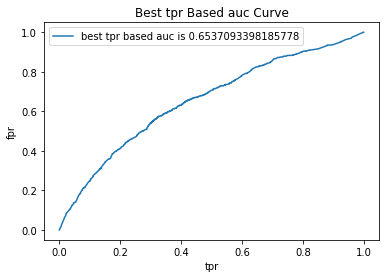

In [36]:
# Find the best hyperparameter for the best tpr

max_depth2=df_rf[df_rf['tpr']==df_rf['tpr'].max()]['max_depth'].iloc[0]
min_samples_leaf2=df_rf[df_rf['tpr']==df_rf['tpr'].max()]['min_samples_leaf'].iloc[0]

# Fit again in train_validation_data and test in test data

rf2=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=max_depth2,min_samples_leaf=min_samples_leaf2)
rf2.fit(x_train_validation,y_train_validation)

rf2_tpr,rf2_fpr,_=roc_curve(y_test,rf2.predict_proba(x_test)[:,1])
rf2_auc=roc_auc_score(y_test,rf2.predict_proba(x_test)[:,1])
plt.plot(rf2_tpr,rf2_fpr,label='best tpr based auc is '+str(rf2_auc))
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.legend()
plt.title('Best tpr Based auc Curve')

rf2_true_positive=confusion_matrix(y_test,rf2.predict(x_test))[1][1]
rf2_false_negative=confusion_matrix(y_test,rf2.predict(x_test))[1][0]
rf2_true_positive_rate=rf2_true_positive/(rf2_true_positive+rf2_false_negative)

print('best tpr based auc is '+str(rf2_auc))
print('best tpr based tpr is '+str(rf2_true_positive_rate))